In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np


In [ ]:
data=open('/content/sample_data/poems.txt').read()
corpus = data.lower().split("\n")

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)

In [ ]:
totalwords=len(tokenizer.word_index)+1


In [ ]:
input_sequences=[]
for text in corpus:
  tok=tokenizer.texts_to_sequences([text])[0]
  for i in range(1,len(tok)):
    n_gram=tok[:i+1]
    input_sequences.append(n_gram)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])

In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]


In [ ]:
import tensorflow.keras.utils as ku 

label = ku.to_categorical(label, num_classes=totalwords)

In [ ]:
model = Sequential()
model.add(Embedding(totalwords, 150, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(190, return_sequences = True)))
model.add(LSTM(150))
model.add(Dense(228,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(totalwords/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(totalwords, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 11, 150)           251100    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 11, 380)           518320    
_________________________________________________________________
lstm_9 (LSTM)                (None, 150)               318600    
_________________________________________________________________
dense_12 (Dense)             (None, 228)               34428     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               29312     
_________________________________________________________________
dense_14 (Dense)             (None, 837)               107973    
_________________________________________________________________
dense_15 (Dense)             (None, 1674)             

In [ ]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
121/121 [==============================] - 3s 26ms/step - loss: 1.2640 - accuracy: 0.6650
Epoch 2/200
121/121 [==============================] - 3s 26ms/step - loss: 1.2641 - accuracy: 0.6609
Epoch 3/200
121/121 [==============================] - 3s 26ms/step - loss: 1.2678 - accuracy: 0.6694
Epoch 4/200
121/121 [==============================] - 3s 26ms/step - loss: 1.2216 - accuracy: 0.6793
Epoch 5/200
121/121 [==============================] - 3s 26ms/step - loss: 1.1830 - accuracy: 0.6857
Epoch 6/200
121/121 [==============================] - 3s 26ms/step - loss: 1.1318 - accuracy: 0.7064
Epoch 7/200
121/121 [==============================] - 3s 26ms/step - loss: 1.1443 - accuracy: 0.6989
Epoch 8/200
121/121 [==============================] - 3s 26ms/step - loss: 1.1866 - accuracy: 0.6826
Epoch 9/200
121/121 [==============================] - 3s 26ms/step - loss: 1.2055 - accuracy: 0.6813
Epoch 10/200
121/121 [==============================] - 3s 26ms/step - loss: 1.154

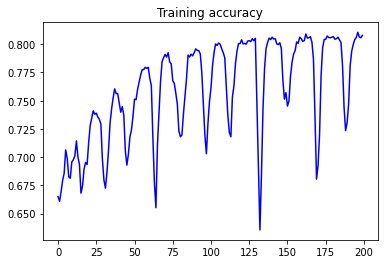

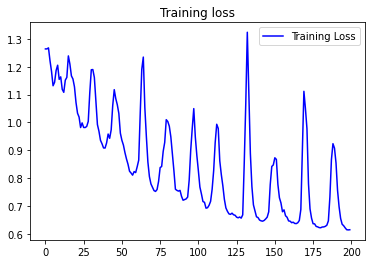

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
def getpoem(seed_text,next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text

In [ ]:

seed=getpoem("A",50)
seed

"A world divided shelter friends a bread half pound and morose lol empty old bronze dramas universe to get argentina but ball youth virtual i dream goodnight to let go kiddo face with rife rife someone all bills even blue today cry away i will have never suppose under a kid's"